In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/atendimentos/atendimentos.csv')

In [3]:
df.sample(5)

,mes,ano,carater_atendimento,cod_forma_organizacao,cod_subgrupo,complexidade,estabelecimento_cnes,grupo,procedimento,quantidade
760810,5,2017,Eletivo,20301,203,Média complexidade,0010537 HMIB Hospital Materno Infantil de Bras...,02 - Procedimentos com Finalidade Diagnóstica,Exame Citopatologico Cervico-vaginal/microflora,1
262951,2,2017,Eletivo,70103,701,Não se aplica,3077098 Ceal Lp,"07 - Órteses, Próteses e Materiais Especiais",Aparelho de Amplificacão Sonora Individual (aa...,2
1075780,6,2017,Informação inexistente (bpa-c),30101,301,Atenção Básica,0010685 UBS 04 Samambaia,03 - Procedimentos Clínicos,Consulta Medica em Atençao Basica,8
122378,1,2017,Informação inexistente (bpa-c),30101,301,Média complexidade,0010510 HUB Hospital Universitario de Brasília,03 - Procedimentos Clínicos,Consulta de Profissionais de Nivel Superior na...,6
1251998,7,2017,Informação inexistente (bpa-c),30101,301,Média complexidade,0010510 HUB Hospital Universitario de Brasília,03 - Procedimentos Clínicos,Consulta Medica em Atenção Especializada,8


# Número de atendimentos por mês

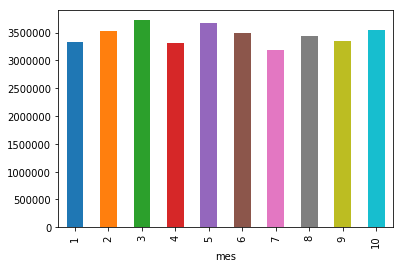

In [7]:
df.groupby('mes')['quantidade'].sum().plot.bar()

In [8]:
df.groupby('mes')['quantidade'].sum().describe()

count    1.000000e+01
mean     3.456710e+06
std      1.670182e+05
min      3.185594e+06
25%      3.333113e+06
50%      3.465306e+06
75%      3.544873e+06
max      3.723312e+06
Name: quantidade, dtype: float64

# Caráter Atendimento

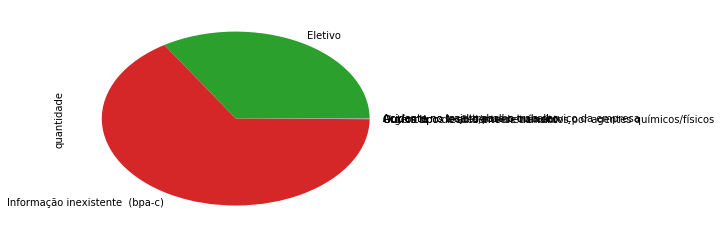

In [9]:
df.groupby('carater_atendimento')['quantidade'].sum().plot.pie()

In [19]:
df.groupby('carater_atendimento')['quantidade'].sum()

carater_atendimento
Acidente no local trabalho ou a serviço da empresa                      226
Acidente no trajeto para o trabalho                                      25
Eletivo                                                            11731614
Informação inexistente  (bpa-c)                                    22798872
Outros tipo de acidente de trânsito                                     209
Outros tipos lesões/envenenamentos por agentes químicos/físicos          22
Urgência                                                              36129
Name: quantidade, dtype: int64

# Complexidade Atendimento

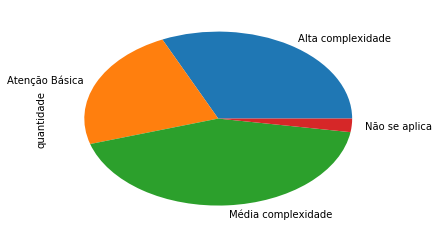

In [10]:
df.groupby('complexidade')['quantidade'].sum().plot.pie()

In [13]:
df['quantidade'].describe()

count    1.881434e+06
mean     1.837274e+01
std      2.626417e+02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      5.000000e+00
max      1.302020e+05
Name: quantidade, dtype: float64

# Quantidade de Valores Únicos para cada Categoria

In [16]:
for col in df.columns:
    c = df[col].nunique()
    print(col, c)

mes 10
ano 1
carater_atendimento 7
cod_forma_organizacao 243
cod_subgrupo 49
complexidade 4
estabelecimento_cnes 297
grupo 8
procedimento 1578
quantidade 3326


# Divisão por grupos

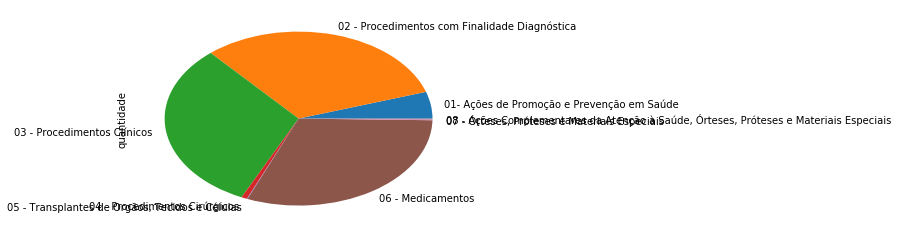

In [17]:
df.groupby('grupo')['quantidade'].sum().plot.pie()

In [18]:
df.groupby('grupo')['quantidade'].sum()

grupo
01- Ações de Promoção e Prevenção em Saúde                                                1720801
02 - Procedimentos com Finalidade Diagnóstica                                            10859083
03 - Procedimentos Clínicos                                                              10924782
04 - Procedimentos Cirúrgicos                                                              240063
05 - Transplantes de Orgãos, Tecidos e Células                                              29242
06 - Medicamentos                                                                        10688387
07 - Órteses, Próteses e Materiais Especiais                                                56680
08 - Ações Complementares da Atenção à Saúde, Órteses, Próteses e Materiais Especiais       48059
Name: quantidade, dtype: int64

# Estabelecimentos

In [26]:
df.groupby(['estabelecimento_cnes', 'grupo']).agg({'quantidade': ['sum']})

quantidade
                                                                                                            sum
estabelecimento_cnes                              grupo                                                        
0010456 HBDF Hospital de Base do Distrito Federal 01- Ações de Promoção e Prevenção em Saúde                907
                                                  02 - Procedimentos com Finalidade Diagnóstica         1805230
                                                  03 - Procedimentos Clínicos                            589192
                                                  04 - Procedimentos Cirúrgicos                           30302
                                                  05 - Transplantes de Orgãos, Tecidos e Células           4337
                                                  07 - Órteses, Próteses e Materiais Especiais             1033
0010464 HRAN Hospital Regional da Asa Norte       01- Ações de Promoção e Prevenção em Saúde               4863
                                                  02 - Procedimentos com Finalidade Diagnóstica          669283
                                                  03 - Procedimentos Clínicos                            339381
                                                  04 - Procedimentos Cirúrgicos                           28892
                                                  07 - Órteses, Próteses e Materiais Especiais              372
                                                  08 - Ações Complementares da Atenção à Saúde, Ó...          1
0010472 HRG Hospital Regional do Gama             01- Ações de Promoção e Prevenção em Saúde               8439
                                                  02 - Procedimentos com Finalidade Diagnóstica          216074
                                                  03 - Procedimentos Clínicos                            176487
                                                  04 - Procedimentos Cirúrgicos                            3217
                                                  07 - Órteses, Próteses e Materiais Especiais             6829
0010480 HRC Hospital Regional de Ceilândia        01- Ações de Promoção e Prevenção em Saúde              22844
                                                  02 - Procedimentos com Finalidade Diagnóstica           88018
                                                  03 - Procedimentos Clínicos                            365222
                                                  04 - Procedimentos Cirúrgicos                            2701
                                                  07 - Órteses, Próteses e Materiais Especiais               64
0010499 HRT Hospital Regional de Taguatinga       01- Ações de Promoção e Prevenção em Saúde               4450
                                                  02 - Procedimentos com Finalidade Diagnóstica          385653
                                                  03 - Procedimentos Clínicos                            289195
                                                  04 - Procedimentos Cirúrgicos                            8582
                                                  07 - Órteses, Próteses e Materiais Especiais            15253
0010502 HRS Hospital Regional de Sobradinho       01- Ações de Promoção e Prevenção em Saúde               8999
                                                  02 - Procedimentos com Finalidade Diagnóstica          283177
                                                  03 - Procedimentos Clínicos                            326047
...                                                                                                         ...
7991355 SAMU DF Motolância 03 Ceilândia I         03 - Procedimentos Clínicos                               465
7991363 SAMU DF 38 USB Recanto das Emas I         03 - Procedimentos Clínicos                              2101
7991371 SAMU DF Motolância 04 Taguatinga I        03 - Procedimentos 

## Hospitais

In [32]:
df['hospital'] = df['estabelecimento_cnes'].str.contains('Hospital')

In [40]:
df['hospital'].fillna(False, inplace=True)

In [42]:
df[df['hospital']]['estabelecimento_cnes'].nunique()

19

Temos 19 hospitais no DF

In [44]:
h = df[df['hospital']]

In [47]:
h.groupby('estabelecimento_cnes')['quantidade'].sum().sort_values(ascending=False)

estabelecimento_cnes
0010456 HBDF Hospital de Base do Distrito Federal           2431001
0010510 HUB Hospital Universitario de Brasília              1499627
0010464 HRAN Hospital Regional da Asa Norte                 1042792
0010537 HMIB Hospital Materno Infantil de Brasília           801589
0010529 HRPl Hospital Regional de Planaltina                 750972
0010499 HRT Hospital Regional de Taguatinga                  703133
0010502 HRS Hospital Regional de Sobradinho                  627052
6876617 HCB Hospital da Criança de Brasília José Alencar     549665
5717515 HRSM Hospital Regional de Santa Maria                490556
0010480 HRC Hospital Regional de Ceilândia                   478849
2645157 HRPa Hospital Regional do Paranoá                    450469
0010472 HRG Hospital Regional do Gama                        411046
0010545 HRBz Hospital Regional de Brazlândia                 396966
2672197 HRSam Hospital Regional de Samambaia                 231678
2814897 HRGu Hospital Regio

In [52]:
df.groupby(['estabelecimento_cnes', 'grupo']).agg({'quantidade': ['sum']})

quantidade
                                                                                                            sum
estabelecimento_cnes                              grupo                                                        
0010456 HBDF Hospital de Base do Distrito Federal 01- Ações de Promoção e Prevenção em Saúde                907
                                                  02 - Procedimentos com Finalidade Diagnóstica         1805230
                                                  03 - Procedimentos Clínicos                            589192
                                                  04 - Procedimentos Cirúrgicos                           30302
                                                  05 - Transplantes de Orgãos, Tecidos e Células           4337
                                                  07 - Órteses, Próteses e Materiais Especiais             1033
0010464 HRAN Hospital Regional da Asa Norte       01- Ações de Promoção e Prevenção em Saúde               4863
                                                  02 - Procedimentos com Finalidade Diagnóstica          669283
                                                  03 - Procedimentos Clínicos                            339381
                                                  04 - Procedimentos Cirúrgicos                           28892
                                                  07 - Órteses, Próteses e Materiais Especiais              372
                                                  08 - Ações Complementares da Atenção à Saúde, Ó...          1
0010472 HRG Hospital Regional do Gama             01- Ações de Promoção e Prevenção em Saúde               8439
                                                  02 - Procedimentos com Finalidade Diagnóstica          216074
                                                  03 - Procedimentos Clínicos                            176487
                                                  04 - Procedimentos Cirúrgicos                            3217
                                                  07 - Órteses, Próteses e Materiais Especiais             6829
0010480 HRC Hospital Regional de Ceilândia        01- Ações de Promoção e Prevenção em Saúde              22844
                                                  02 - Procedimentos com Finalidade Diagnóstica           88018
                                                  03 - Procedimentos Clínicos                            365222
                                                  04 - Procedimentos Cirúrgicos                            2701
                                                  07 - Órteses, Próteses e Materiais Especiais               64
0010499 HRT Hospital Regional de Taguatinga       01- Ações de Promoção e Prevenção em Saúde               4450
                                                  02 - Procedimentos com Finalidade Diagnóstica          385653
                                                  03 - Procedimentos Clínicos                            289195
                                                  04 - Procedimentos Cirúrgicos                            8582
                                                  07 - Órteses, Próteses e Materiais Especiais            15253
0010502 HRS Hospital Regional de Sobradinho       01- Ações de Promoção e Prevenção em Saúde               8999
                                                  02 - Procedimentos com Finalidade Diagnóstica          283177
                                                  03 - Procedimentos Clínicos                            326047
...                                                                                                         ...
7991355 SAMU DF Motolância 03 Ceilândia I         03 - Procedimentos Clínicos                               465
7991363 SAMU DF 38 USB Recanto das Emas I         03 - Procedimentos Clínicos                              2101
7991371 SAMU DF Motolância 04 Taguatinga I        03 - Procedimentos 